In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.test.gpu_device_name()

'/device:GPU:0'

# data prep

### load index prices

In [3]:
spy = yf.Ticker("SPY").history(start="2000-01-01")[['Close', 'Volume']].rename(columns={'Close':'spy close', 
                                                                                        'Volume':'spy volume'})

In [4]:
spy

,spy close,spy volume
Date,,
2000-01-03,98.96,8164300
2000-01-04,95.09,8089800
2000-01-05,95.26,12177900
2000-01-06,93.73,6227200
2000-01-07,99.17,8066500
...,...,...
2020-07-09,314.38,83354200
2020-07-10,317.59,57550400
2020-07-13,314.84,102997500


In [5]:
qqq = yf.Ticker("QQQ").history(start="2000-01-01")[['Close', 'Volume']].rename(columns={'Close':'qqq close', 
                                                                                        'Volume':'qqq volume'})

In [6]:
qqq

,qqq close,qqq volume
Date,,
2000-01-03,82.62,36345200
2000-01-04,76.95,33786600
2000-01-05,74.99,42496600
2000-01-06,69.84,37134800
2000-01-07,78.47,28138200
...,...,...
2020-07-09,262.18,40312900
2020-07-10,263.97,32885300
2020-07-13,258.54,64108100


In [7]:
dji = yf.Ticker("DIA").history(start="2000-01-01")[['Close', 'Volume']].rename(columns={'Close':'dji close', 
                                                                                        'Volume':'dji volume'})

In [8]:
dji

,dji close,dji volume
Date,,
2000-01-03,71.60,1278800
2000-01-04,69.24,1535700
2000-01-05,70.14,2007000
2000-01-06,70.49,2639500
2000-01-07,72.86,3767400
...,...,...
2020-07-09,257.24,3995600
2020-07-10,260.82,3110100
2020-07-13,261.04,4876000


In [9]:
data=pd.concat([spy, qqq, dji], axis=1)

In [10]:
data

,spy close,spy volume,qqq close,qqq volume,dji close,dji volume
Date,,,,,,
2000-01-03,98.96,8164300,82.62,36345200,71.60,1278800
2000-01-04,95.09,8089800,76.95,33786600,69.24,1535700
2000-01-05,95.26,12177900,74.99,42496600,70.14,2007000
2000-01-06,93.73,6227200,69.84,37134800,70.49,2639500
2000-01-07,99.17,8066500,78.47,28138200,72.86,3767400
...,...,...,...,...,...,...
2020-07-09,314.38,83354200,262.18,40312900,257.24,3995600
2020-07-10,317.59,57550400,263.97,32885300,260.82,3110100
2020-07-13,314.84,102997500,258.54,64108100,261.04,4876000


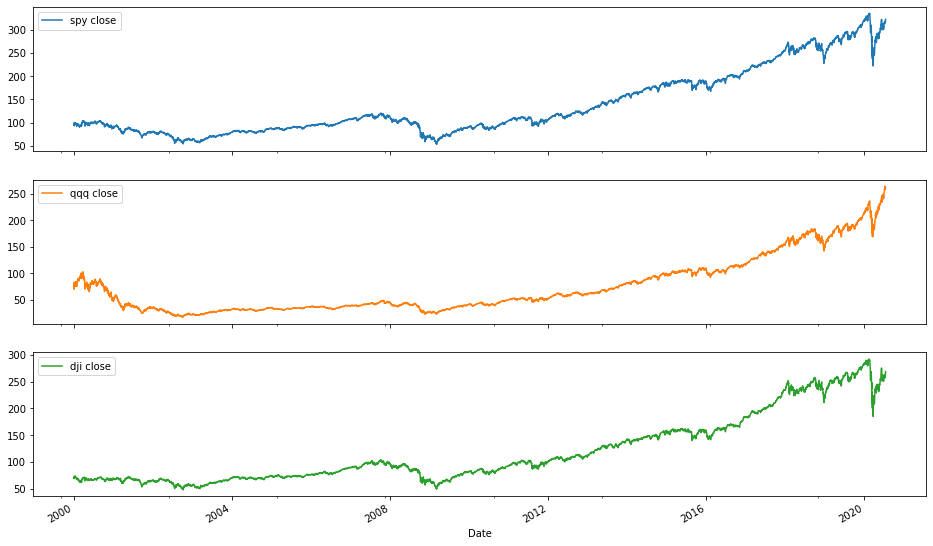

In [11]:
data[['spy close', 'qqq close', 'dji close']].plot(subplots=True, figsize=(16, 10));

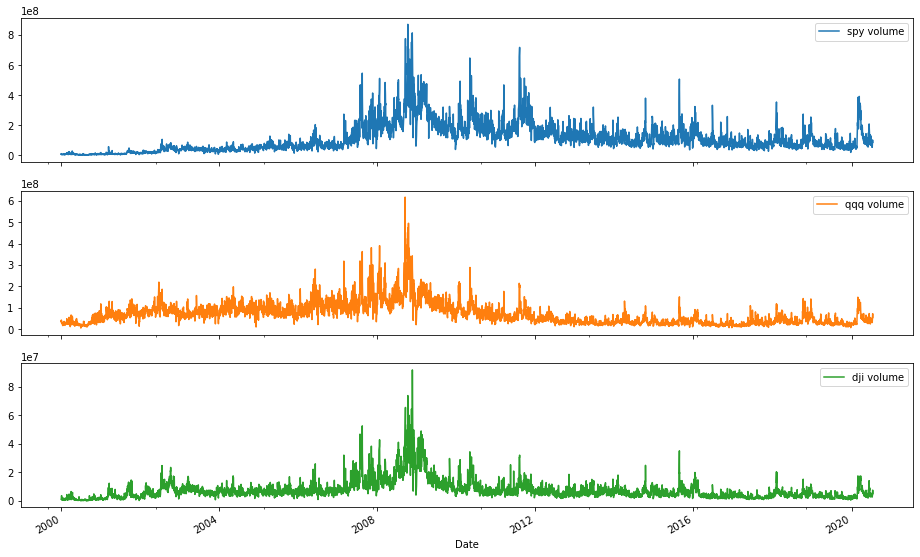

In [12]:
data[['spy volume', 'qqq volume', 'dji volume']].plot(subplots=True, figsize=(16, 10));

In [13]:
#logarithmic returns and volume columns

data['SPY log']=np.log(data['spy close']/data['spy close'].shift(1))
data['SPY VOL log']=np.log(data['spy volume']/data['spy volume'].shift(1))
data['QQQ log']=np.log(data['qqq close']/data['qqq close'].shift(1))
data['QQQ VOL log']=np.log(data['qqq volume']/data['qqq volume'].shift(1))
data['DJI log']=np.log(data['dji close']/data['dji close'].shift(1))
data['DJI VOL log']=np.log(data['dji volume']/data['dji volume'].shift(1))

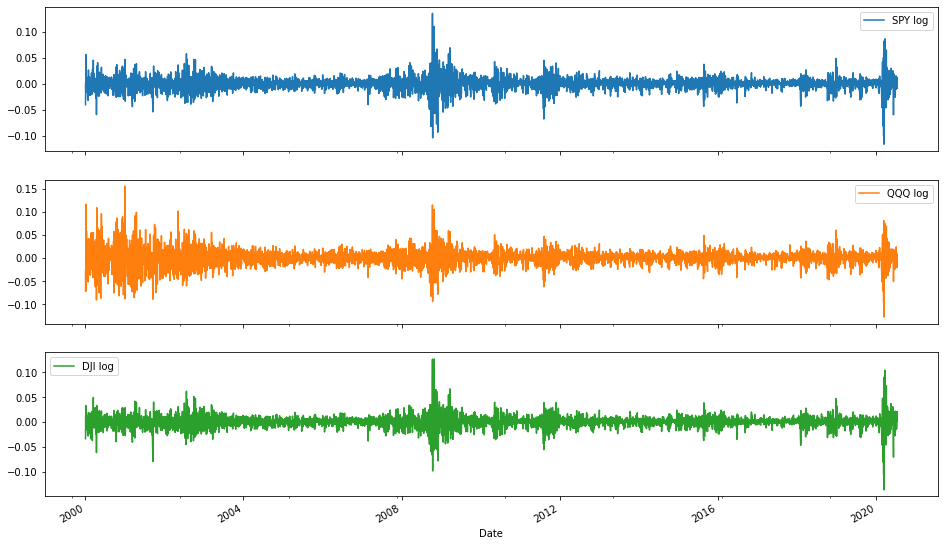

In [14]:
data[['SPY log', 'QQQ log', 'DJI log']].plot(subplots=True, figsize=(16, 10));

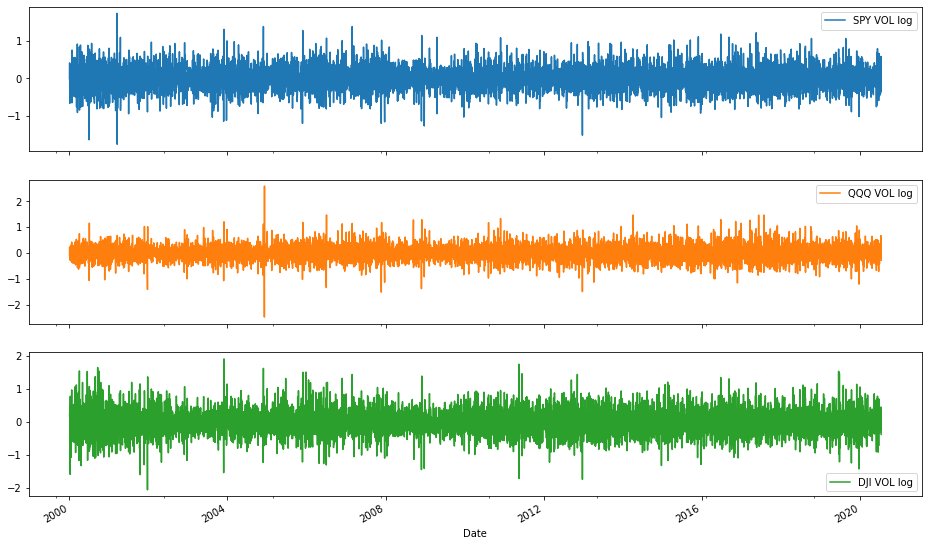

In [15]:
data[['SPY VOL log', 'QQQ VOL log', 'DJI VOL log']].plot(subplots=True, figsize=(16, 10));

In [16]:
#create labels for each day's returns on previous day's close

label_ratios=list(data['spy close']/data['spy close'].shift(1))
threshold=.03
label=[]
for x in label_ratios:
    #between .97 and 1.03
    if x>1-threshold and x<1+threshold:
        label.append(0)
    #above 1.03
    elif x>= 1+threshold:
        label.append(1)
    #below .97
    elif x<= 1-threshold:
        label.append(2)
    #if nan
    else:
        label.append(0)
data['label']=label

In [17]:
data=data.iloc[1:]

In [18]:
data

,spy close,spy volume,qqq close,qqq volume,dji close,dji volume,SPY log,SPY VOL log,QQQ log,QQQ VOL log,DJI log,DJI VOL log,label
Date,,,,,,,,,,,,,
2000-01-04,95.09,8089800,76.95,33786600,69.24,1535700,-0.039892,-0.009167,-0.071096,-0.072998,-0.033516,0.183064,2
2000-01-05,95.26,12177900,74.99,42496600,70.14,2007000,0.001786,0.409019,-0.025801,0.229360,0.012915,0.267655,0
2000-01-06,93.73,6227200,69.84,37134800,70.49,2639500,-0.016192,-0.670696,-0.071148,-0.134870,0.004978,0.273948,0
2000-01-07,99.17,8066500,78.47,28138200,72.86,3767400,0.056417,0.258793,0.116509,-0.277426,0.033069,0.355796,1
2000-01-10,99.51,5741700,80.65,29675600,73.17,762900,0.003423,-0.339964,0.027402,0.053197,0.004246,-1.597013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-09,314.38,83354200,262.18,40312900,257.24,3995600,-0.005709,0.422358,0.008388,0.281364,-0.013438,0.342165,0
2020-07-10,317.59,57550400,263.97,32885300,260.82,3110100,0.010159,-0.370438,0.006804,-0.203646,0.013821,-0.250539,0
2020-07-13,314.84,102997500,258.54,64108100,261.04,4876000,-0.008697,0.582044,-0.020785,0.667545,0.000843,0.449670,0


In [19]:
#save prepared data

data.to_csv('anomaly_detection_data.csv')

In [20]:
#split data into 15 day windows

data_np=data[['SPY log', 'QQQ log', 'DJI log', 'SPY VOL log', 'QQQ VOL log', 'DJI VOL log', 'label']].to_numpy()
window=15
gap=1
data_windows=[]
for x in range(len(data_np)-window): 
    data_windows.append(data_np[x:x+window])
data_windows=np.asarray(data_windows)
train=data_windows[:-1500]
valid=data_windows[-1500:-1000]
test=data_windows[-1000:]
np.random.shuffle(train)

In [21]:
print(train.shape)
print(valid.shape)
print(test.shape)

(3650, 15, 7)
(500, 15, 7)
(1000, 15, 7)


In [22]:
#helper function to get all but last array inside numpy array of shape (15, 6)

def getfirstn(array):
    new=[]
    for x in array:
        new.append(list(x[:-1]))
    return np.asarray(new)

In [23]:
X_train=[]
for x in train:
    X_train.append(getfirstn(x)[:window-gap])

In [24]:
X_valid=[]
for x in valid:
    X_valid.append(getfirstn(x)[:window-gap])

In [25]:
X_test=[]
y_test=[]
for x in test:
    X_test.append(getfirstn(x)[:window-gap])
    y_test.append(x[-1][-1])

In [26]:
X_train=np.asarray(X_train)
X_valid=np.asarray(X_valid)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [27]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_test.shape)

(3650, 14, 6)
(500, 14, 6)
(1000, 14, 6)
(1000,)


# model training

### deep autoencoder

In [28]:
timesteps =  X_train.shape[1] 
print(timesteps)
n_features =  X_train.shape[2]
print(n_features)

epochs = 250
batch = 32

input_window = tf.keras.Input(shape=(timesteps, n_features))

x = tf.keras.layers.Dense(5, activation='relu')(input_window)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.Dense(3, activation='relu')(x)

x = tf.keras.layers.Dense(5, activation='relu')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Dense(n_features, activation='sigmoid')(x)

model = tf.keras.Model(input_window, decoded)

model.summary()

model.compile(loss="mean_squared_error",
              optimizer='adam',
              metrics=["accuracy"])

cp = tf.keras.callbacks.ModelCheckpoint(filepath="deep_autoencoder.h5",
                               save_best_only=True,
                               verbose=0)

history = model.fit(X_train, X_train, epochs=epochs, batch_size=batch, shuffle=True,
                    validation_data = (X_valid, X_valid), callbacks=[cp]).history

14
6
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 6)]           0         
_________________________________________________________________
dense (Dense)                (None, 14, 5)             35        
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 5)             20        
_________________________________________________________________
dense_1 (Dense)              (None, 14, 3)             18        
_________________________________________________________________
dense_2 (Dense)              (None, 14, 5)             20        
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 5)             20        
_________________________________________________________________
dense_3 (Dense)              (None, 14, 6)             3

Epoch 47/250
3650/3650 [==============================] - 1s 204us/sample - loss: 0.0353 - accuracy: 0.5428 - val_loss: 0.0361 - val_accuracy: 0.5560
Epoch 48/250
3650/3650 [==============================] - 1s 212us/sample - loss: 0.0353 - accuracy: 0.5423 - val_loss: 0.0360 - val_accuracy: 0.5453
Epoch 49/250
3650/3650 [==============================] - 1s 207us/sample - loss: 0.0353 - accuracy: 0.5405 - val_loss: 0.0361 - val_accuracy: 0.5560
Epoch 50/250
3650/3650 [==============================] - 1s 214us/sample - loss: 0.0353 - accuracy: 0.5403 - val_loss: 0.0360 - val_accuracy: 0.5440
Epoch 51/250
3650/3650 [==============================] - 1s 204us/sample - loss: 0.0353 - accuracy: 0.5397 - val_loss: 0.0361 - val_accuracy: 0.5560
Epoch 52/250
3650/3650 [==============================] - 1s 211us/sample - loss: 0.0353 - accuracy: 0.5414 - val_loss: 0.0360 - val_accuracy: 0.5560
Epoch 53/250
3650/3650 [==============================] - 1s 212us/sample - loss: 0.0352 - accuracy:

3650/3650 [==============================] - 1s 221us/sample - loss: 0.0351 - accuracy: 0.5445 - val_loss: 0.0360 - val_accuracy: 0.5387
Epoch 102/250
3650/3650 [==============================] - 1s 219us/sample - loss: 0.0351 - accuracy: 0.5459 - val_loss: 0.0360 - val_accuracy: 0.5347
Epoch 103/250
3650/3650 [==============================] - 1s 223us/sample - loss: 0.0351 - accuracy: 0.5447 - val_loss: 0.0359 - val_accuracy: 0.5327
Epoch 104/250
3650/3650 [==============================] - 1s 221us/sample - loss: 0.0351 - accuracy: 0.5437 - val_loss: 0.0359 - val_accuracy: 0.5247
Epoch 105/250
3650/3650 [==============================] - 1s 218us/sample - loss: 0.0351 - accuracy: 0.5423 - val_loss: 0.0360 - val_accuracy: 0.5367
Epoch 106/250
3650/3650 [==============================] - 1s 218us/sample - loss: 0.0351 - accuracy: 0.5405 - val_loss: 0.0360 - val_accuracy: 0.5167
Epoch 107/250
3650/3650 [==============================] - 1s 215us/sample - loss: 0.0351 - accuracy: 0.5413

3650/3650 [==============================] - 1s 225us/sample - loss: 0.0351 - accuracy: 0.5439 - val_loss: 0.0363 - val_accuracy: 0.5276
Epoch 156/250
3650/3650 [==============================] - 1s 223us/sample - loss: 0.0351 - accuracy: 0.5429 - val_loss: 0.0361 - val_accuracy: 0.5189
Epoch 157/250
3650/3650 [==============================] - 1s 224us/sample - loss: 0.0351 - accuracy: 0.5426 - val_loss: 0.0360 - val_accuracy: 0.5273
Epoch 158/250
3650/3650 [==============================] - 1s 218us/sample - loss: 0.0351 - accuracy: 0.5425 - val_loss: 0.0359 - val_accuracy: 0.5273
Epoch 159/250
3650/3650 [==============================] - 1s 216us/sample - loss: 0.0351 - accuracy: 0.5454 - val_loss: 0.0359 - val_accuracy: 0.5213
Epoch 160/250
3650/3650 [==============================] - 1s 216us/sample - loss: 0.0351 - accuracy: 0.5441 - val_loss: 0.0359 - val_accuracy: 0.5376
Epoch 161/250
3650/3650 [==============================] - 1s 217us/sample - loss: 0.0351 - accuracy: 0.5425

3650/3650 [==============================] - 1s 214us/sample - loss: 0.0351 - accuracy: 0.5360 - val_loss: 0.0359 - val_accuracy: 0.5213
Epoch 210/250
3650/3650 [==============================] - 1s 221us/sample - loss: 0.0351 - accuracy: 0.5323 - val_loss: 0.0359 - val_accuracy: 0.5233
Epoch 211/250
3650/3650 [==============================] - 1s 218us/sample - loss: 0.0351 - accuracy: 0.5324 - val_loss: 0.0360 - val_accuracy: 0.5193
Epoch 212/250
3650/3650 [==============================] - 1s 222us/sample - loss: 0.0351 - accuracy: 0.5377 - val_loss: 0.0360 - val_accuracy: 0.5297
Epoch 213/250
3650/3650 [==============================] - 1s 223us/sample - loss: 0.0351 - accuracy: 0.5420 - val_loss: 0.0359 - val_accuracy: 0.5224
Epoch 214/250
3650/3650 [==============================] - 1s 220us/sample - loss: 0.0351 - accuracy: 0.5458 - val_loss: 0.0359 - val_accuracy: 0.5104
Epoch 215/250
3650/3650 [==============================] - 1s 219us/sample - loss: 0.0351 - accuracy: 0.5407

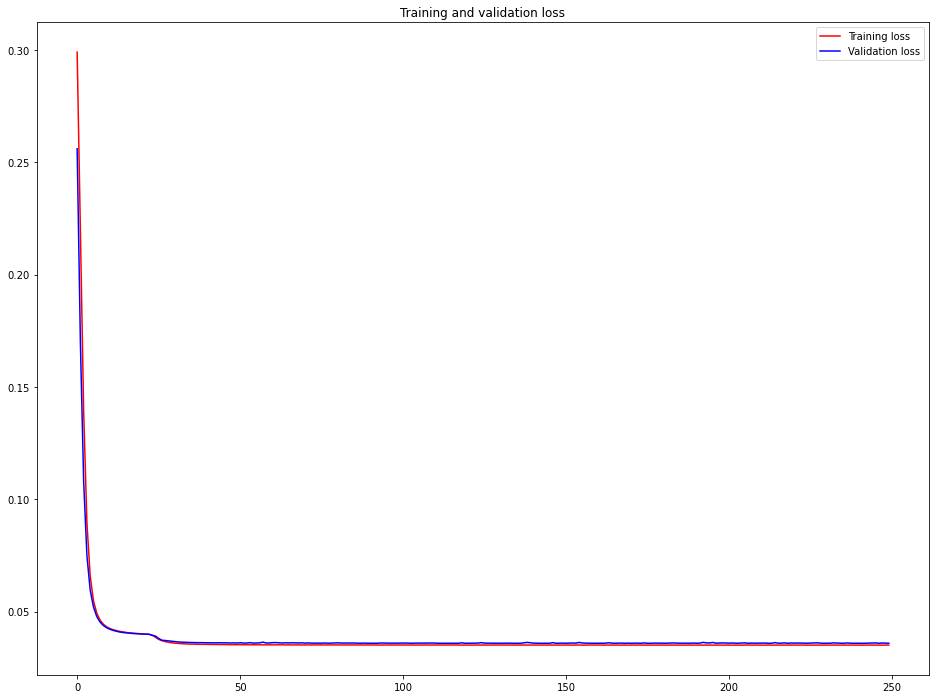

<Figure size 432x288 with 0 Axes>

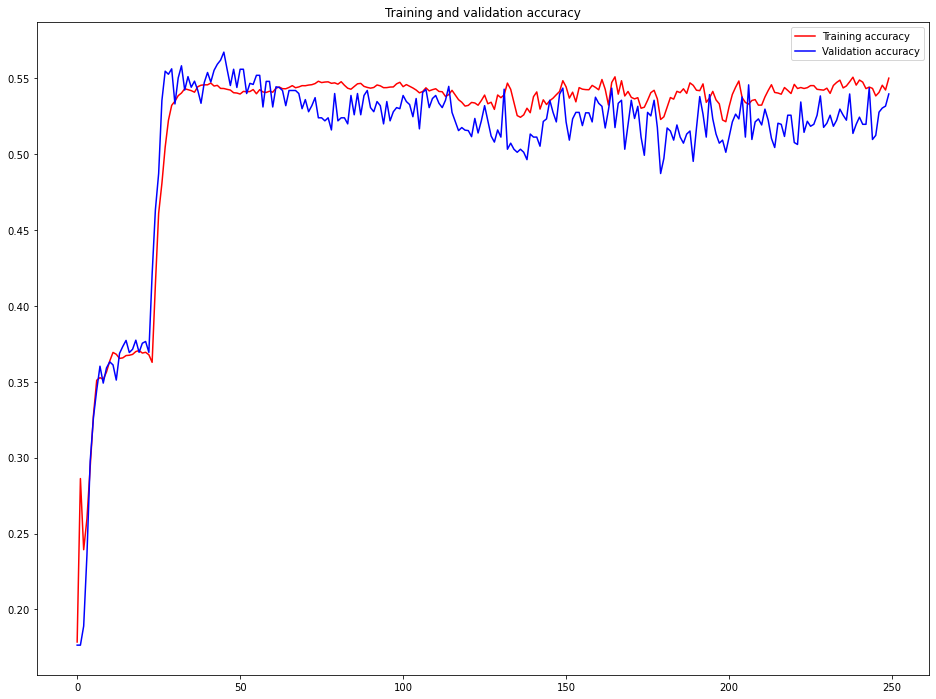

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

plt.figure(figsize = (16,12))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.figure(figsize = (16,12))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

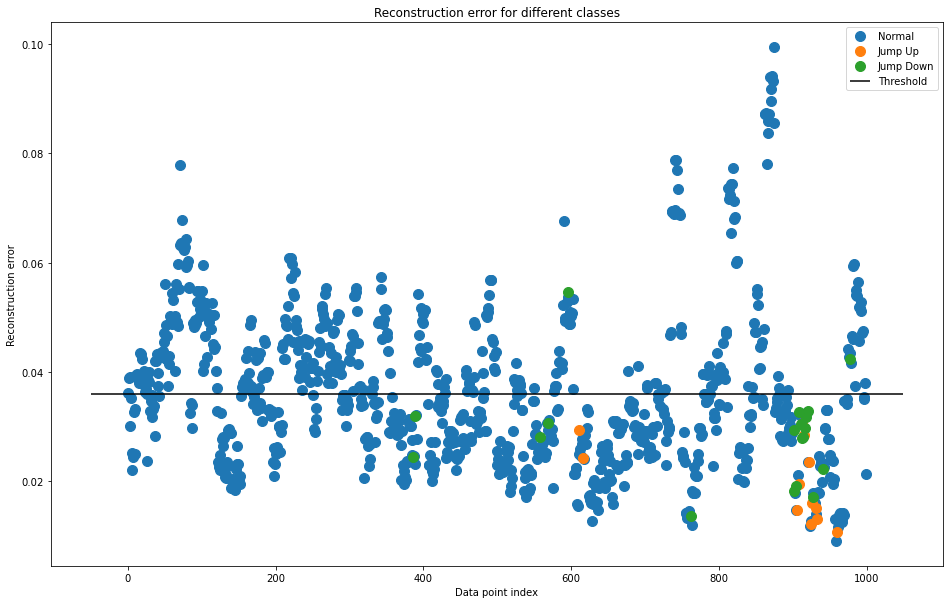

In [30]:
# see if there is some sort of visible pattern, ie points above threshold more likely to be large jump up or down

predictions = model.predict(X_test)
mse=list([np.mean((np.power(X_test[n].flatten()-predictions[n].flatten(),2))) for n in range(len(predictions))])

error_df_test = pd.DataFrame({'Reconstruction_error': mse, 'Class': y_test})
error_df_test = error_df_test.reset_index()

threshold_fixed = sum(mse)/len(mse)
groups = error_df_test.groupby('Class')
fig, ax = plt.subplots(figsize = (16,10))
for name, group in groups:
    if name==1:
        label='Jump Up'
    elif name==2:
        label='Jump Down'
    else:
        label='Normal'
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=10, linestyle='', label=label)
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

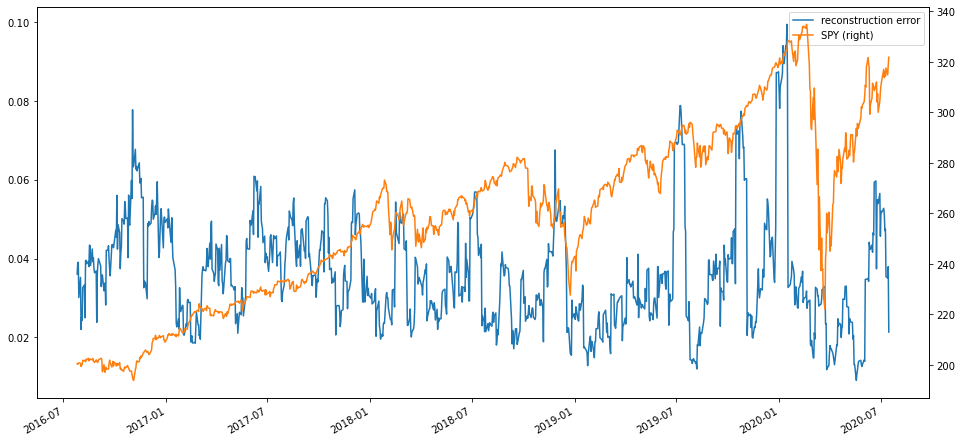

In [31]:
#compare reconstruction error to spy price

error_and_price = pd.DataFrame({'reconstruction error': mse, 'SPY': data['spy close'][-1000:]}, 
                               index=np.asarray(data.index)[-1000:])
error_and_price.plot(secondary_y='SPY', figsize=(16, 8));  